# CNN's for Image Classification using Fast.ai Library

Este código foi criado para apresentação no evento Machine Learning Experience no dia 14-03-2018

The main objective is a classification model creation trained in Lego brick dataset extracted from [kaggle](https://www.kaggle.com/joosthazelzet/lego-brick-images).







## Setup fast.ai enviroment

In [0]:
#installing the packages
!pip3 install fastai torchvision-nightly
!pip3 install fastai fastai

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
#loading the packages
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image

In [83]:
#verifying the GPU is avaliabale
torch.cuda.is_available()

True

## Unzip dataset

Link para o dataset no kaggle

[https://www.kaggle.com/joosthazelzet/lego-brick-imagest](https://www.kaggle.com/joosthazelzet/lego-brick-images)



In [0]:
#unzip
!unzip /content/lego-brick-images.zip

## Exploring the dataset

In [0]:
PATH = "/content/LEGO brick images/"

In [0]:
os.listdir(PATH)

['train', 'valid']

In [0]:
os.listdir(f'{PATH}/train')

['6632 Technic Lever 3M',
 '32123 half Bush',
 '3673 Peg 2M',
 '3069 Flat Tile 1x2',
 '3040 Roof Tile 1x2x45deg',
 '3004 Brick 1x2',
 '2357 Brick corner 1x2x2',
 '3023 Plate 1x2',
 '3022 Plate 2x2',
 '3024 Plate 1x1',
 '3794 Plate 1X2 with 1 Knob',
 '3713 Bush for Cross Axle',
 '3005 Brick 1x1',
 '18651 Cross Axle 2M with Snap friction',
 '3003 Brick 2x2',
 '11214 Bush 3M friction with Cross axle']

In [0]:
len(os.listdir(f'{PATH}/train'))

16

In [0]:
len(os.listdir(f'{PATH}/valid')) 

16

In [0]:
os.listdir(f'{PATH}/valid')

['6632 Technic Lever 3M',
 '32123 half Bush',
 '3673 Peg 2M',
 '3069 Flat Tile 1x2',
 '3040 Roof Tile 1x2x45deg',
 '3004 Brick 1x2',
 '2357 Brick corner 1x2x2',
 '3023 Plate 1x2',
 '3022 Plate 2x2',
 '3024 Plate 1x1',
 '3794 Plate 1X2 with 1 Knob',
 '3713 Bush for Cross Axle',
 '3005 Brick 1x1',
 '18651 Cross Axle 2M with Snap friction',
 '3003 Brick 2x2',
 '11214 Bush 3M friction with Cross axle']

In [0]:
files = os.listdir(f'{PATH}valid/3023 Plate 1x2')[:10]
files

['0389.png',
 '0233.png',
 '0378.png',
 '0358.png',
 '0319.png',
 '0118.png',
 '0142.png',
 '0380.png',
 '0365.png',
 '0293.png']

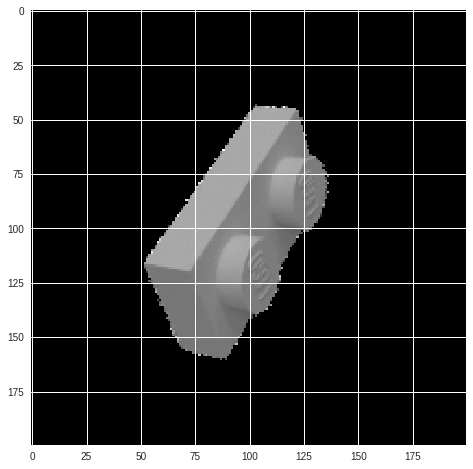

In [0]:
image = "/content/LEGO brick images/train/3023 Plate 1x2/0165.png"
import cv2
image = cv2.imread(image_path)
plt.figure(figsize=(8,8))
plt.imshow(image)

In [0]:
image.shape

(200, 200, 3)

## Treinando o ultimo layer

In [0]:
#databunch creation
bs = 64
data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=200, bs = bs).normalize(imagenet_stats)

**O Databunch pode ser criado:**

**.from_folders** = requires a specific folder arrangement

**.from_csv** = requires a .csv files with file path and labels

**.from_name **= Used when the name of labels were in file name

**.from_df** = Using a dataframe on the enviroment

**.from_list **= Using lists to pass the data


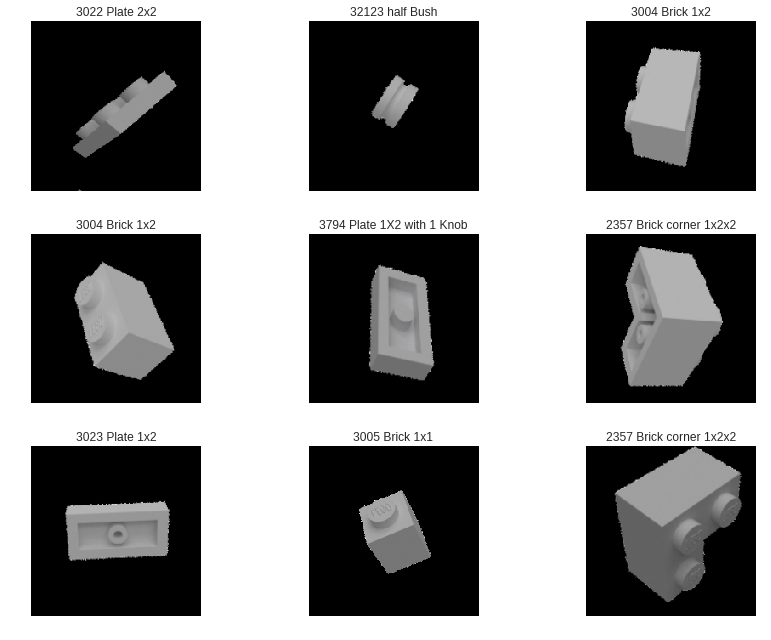

In [0]:
#showing some images of the databunch
data.show_batch(rows = 3, figsize= (12,9))

In [0]:
data

ImageDataBunch;

Train: LabelList (6379 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
6632 Technic Lever 3M,6632 Technic Lever 3M,6632 Technic Lever 3M,6632 Technic Lever 3M,6632 Technic Lever 3M
Path: /content/LEGO brick images;

Valid: LabelList (6379 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
6632 Technic Lever 3M,6632 Technic Lever 3M,6632 Technic Lever 3M,6632 Technic Lever 3M,6632 Technic Lever 3M
Path: /content/LEGO brick images;

Test: None

In [88]:
data.classes

['11214 Bush 3M friction with Cross axle',
 '18651 Cross Axle 2M with Snap friction',
 '2357 Brick corner 1x2x2',
 '3003 Brick 2x2',
 '3004 Brick 1x2',
 '3005 Brick 1x1',
 '3022 Plate 2x2',
 '3023 Plate 1x2',
 '3024 Plate 1x1',
 '3040 Roof Tile 1x2x45deg',
 '3069 Flat Tile 1x2',
 '32123 half Bush',
 '3673 Peg 2M',
 '3713 Bush for Cross Axle',
 '3794 Plate 1X2 with 1 Knob',
 '6632 Technic Lever 3M']

In [89]:
len(data.classes)

16

In [0]:
#model creation
learn = create_cnn(data, models.resnet34, metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 72887702.70it/s]


Utilizamos de **transferencia de aprendizagem** para treinar a nossa rede.

Escolhemos a rede **ResNet34** treinada apartir do banco de dados** ImageNet**


**Algumas outras métricas que posso solicitar**

Acuraccy_tresh = Acuracia no intervalo

mean_squared_error = Erro médio ao quadrado

fbeta = fbeta



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


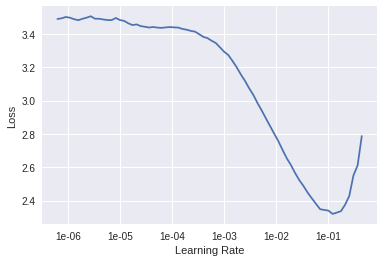

In [0]:
#finding the optimal learning rate
ln = learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 1e-2/2
n_epoch = 2

Escolhemos uma taxa de aprendizagem em um ponto da curva com grande variação decrescente. 

In [0]:
learn.fit_one_cycle(n_epoch, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
1,0.228052,0.132838,0.950462,0.049538,01:25
2,0.195184,0.077949,0.971782,0.028218,01:24


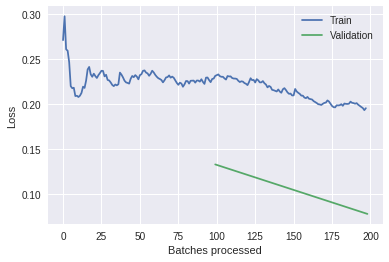

In [0]:
learn.recorder.plot_losses()

## Final Tunning - Treinando todos os layers

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


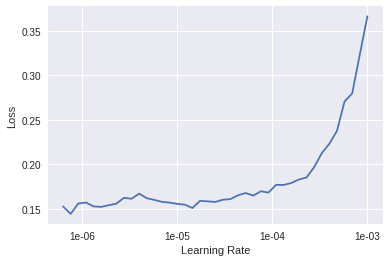

In [0]:
ln = learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,error_rate,time
1,0.128212,0.045418,0.983697,0.016303,01:28
2,0.109804,0.040916,0.985421,0.014579,01:28


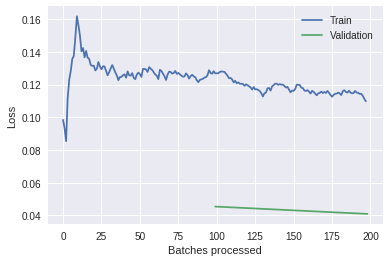

In [0]:
#training the model with the new learning rate
learn.fit_one_cycle(2, max_lr=slice(1e-5/2,1e-4/2))
learn.recorder.plot_losses()

In [0]:
#saving the layer
learn.save('stage-2')

## Interpretando o Modelo

In [0]:
#creating the interperter

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

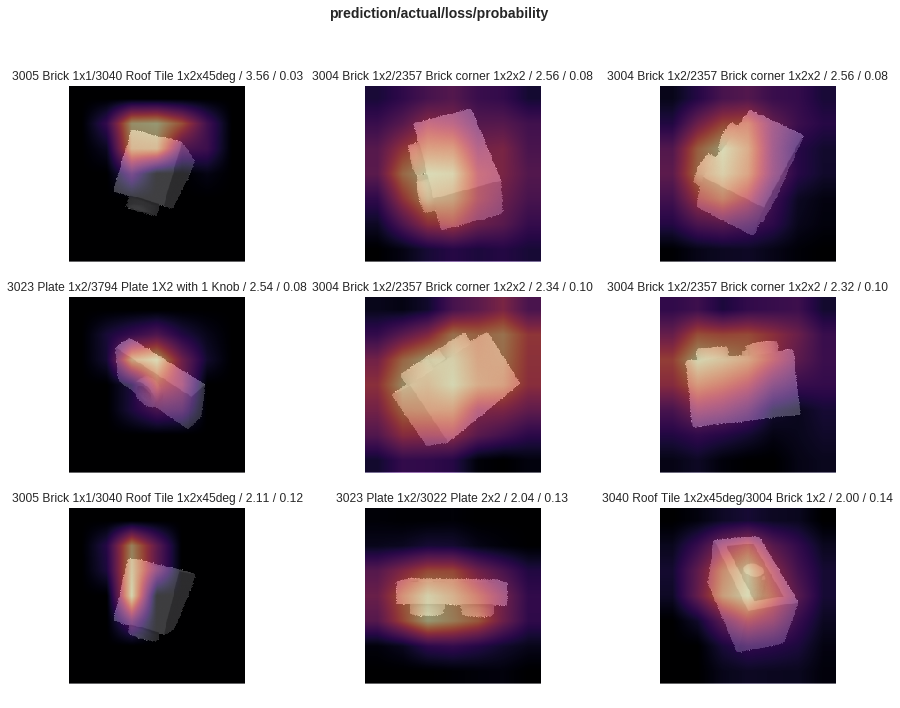

In [0]:
#plotting top_loses

interp.plot_top_losses(9, figsize=(15,11))

In [0]:
#most confused
interp.most_confused(min_val=2)

[('2357 Brick corner 1x2x2', '3004 Brick 1x2', 32),
 ('3040 Roof Tile 1x2x45deg', '3005 Brick 1x1', 14),
 ('3005 Brick 1x1', '3040 Roof Tile 1x2x45deg', 10),
 ('3023 Plate 1x2', '3794 Plate 1X2 with 1 Knob', 7),
 ('3794 Plate 1X2 with 1 Knob', '3023 Plate 1x2', 7),
 ('3022 Plate 2x2', '3023 Plate 1x2', 6),
 ('3023 Plate 1x2', '3022 Plate 2x2', 4),
 ('3040 Roof Tile 1x2x45deg', '3004 Brick 1x2', 3),
 ('18651 Cross Axle 2M with Snap friction', '3673 Peg 2M', 2),
 ('3004 Brick 1x2', '3040 Roof Tile 1x2x45deg', 2),
 ('3673 Peg 2M', '32123 half Bush', 2)]

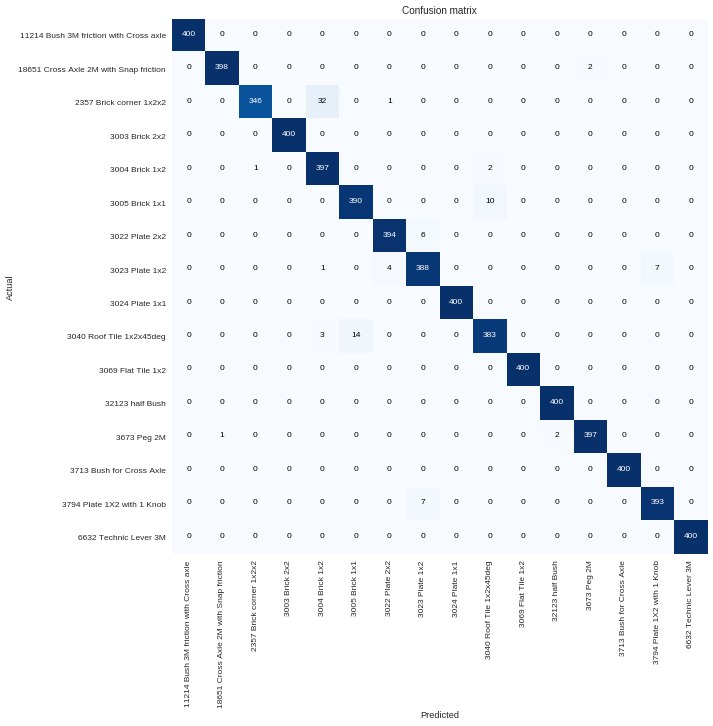

In [0]:
#confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)